In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout , Flatten ,LeakyReLU as LR, Activation, Input,Reshape
from tensorflow.keras.models import Sequential,Model

In [22]:
fashion_mnist=tf.keras.datasets.fashion_mnist

(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()
X_train,X_test = X_train/255.0,X_test/255.0
print(X_train.shape)

(60000, 28, 28)


In [4]:
LATENT_SIZE = 32

In [5]:
encoder=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(512),
    LR(),
    Dropout(0.5),
    Dense(256),
    LR(),
    Dropout(0.5),
    Dense(128),
    LR(),
    Dropout(0.5),
    Dense(64),
    LR(),
    Dropout(0.5),
    Dense(LATENT_SIZE),
    LR()
])

In [8]:
decoder = Sequential([
    Dense(64, input_shape = (LATENT_SIZE,)),
    LR(),
    Dropout(0.5),
    Dense(128),
    LR(),
    Dropout(0.5),
    Dense(256),
    LR(),
    Dropout(0.5),
    Dense(512),
    LR(),
    Dropout(0.5),
    Dense(784),
    Activation("sigmoid"),
    Reshape((28, 28))
])

In [9]:
img = Input(shape = (28, 28))

In [10]:
latent_vector = encoder(img)
output = decoder(latent_vector)

In [11]:
model = Model(inputs = img, outputs = output)
model.compile("nadam", loss = "binary_crossentropy")

In [15]:
autoencoder_train=model.fit(X_train, X_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 54s 29ms/step - loss: 0.3808
Epoch 2/20
1875/1875 [==============================] - 55s 30ms/step - loss: 0.3670 0s 
Epoch 3/20
1875/1875 [==============================] - 53s 28ms/step - loss: 0.3614
Epoch 4/20
1875/1875 [==============================] - 51s 27ms/step - loss: 0.3575
Epoch 5/20
1875/1875 [==============================] - 52s 28ms/step - loss: 0.3550
Epoch 6/20
1875/1875 [==============================] - 48s 26ms/step - loss: 0.3529
Epoch 7/20
1875/1875 [==============================] - 47s 25ms/step - loss: 0.3517
Epoch 8/20
1875/1875 [==============================] - 47s 25ms/step - loss: 0.3509
Epoch 9/20
1875/1875 [==============================] - 48s 26ms/step - loss: 0.3501
Epoch 10/20
1875/1875 [==============================] - 47s 25ms/step - loss: 0.3497 0s - loss: - ETA: 0s - loss
Epoch 11/20
1875/1875 [==============================] - 48s 26ms/step - loss: 0.3493
Epoch 12/20
1875/1875 [========

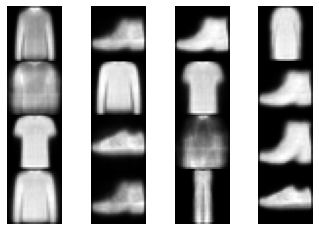

In [23]:
fig, axs = plt.subplots(4, 4)
rand = X_test[np.random.randint(0, 10000, 16)].reshape((4, 4, 1, 28, 28))
  
for i in range(4):
    for j in range(4):
        axs[i, j].imshow(model.predict(rand[i, j])[0], cmap = "gray")
        axs[i, j].axis("off")
    
plt.subplots_adjust(wspace = 0, hspace = 0)
plt.show()

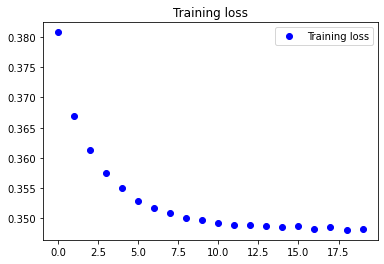

In [27]:
loss = autoencoder_train.history['loss']
epochs = range(20)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.legend()
plt.show()

In [28]:
batch_size = 128
epochs = 20 
inChannel = 1
x, y = 28, 28
input_img = Input(shape = (x, y, inChannel))

In [30]:
from sklearn.model_selection import train_test_split
train_data=X_train
train_X,valid_X,train_ground,valid_ground = train_test_split(train_data,train_data,test_size=0.2,random_state=13)

In [31]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,UpSampling2D
def autoencoder(input_img):
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) 
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) 
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1) 
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) 
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2) 

    
    conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3) 
    up1 = UpSampling2D((2,2))(conv4) 
    conv5 = Conv2D(64, (3, 3), activation='relu', padding='same')(up1) 
    up2 = UpSampling2D((2,2))(conv5) 
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2)
    return decoded

In [32]:
from keras.optimizers import RMSprop
autoencoder = Model(input_img, autoencoder(input_img))
autoencoder.compile(loss='mean_squared_error', optimizer = RMSprop())

In [33]:
autoencoder_train = autoencoder.fit(train_X, train_ground, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_ground))

Epoch 1/20
375/375 [==============================] - 260s 693ms/step - loss: 0.0230 - val_loss: 0.0102
Epoch 2/20
375/375 [==============================] - 263s 701ms/step - loss: 0.0095 - val_loss: 0.0080
Epoch 3/20
375/375 [==============================] - 266s 709ms/step - loss: 0.0072 - val_loss: 0.0061
Epoch 4/20
375/375 [==============================] - 251s 669ms/step - loss: 0.0060 - val_loss: 0.0057
Epoch 5/20
375/375 [==============================] - 255s 680ms/step - loss: 0.0053 - val_loss: 0.0050
Epoch 6/20
375/375 [==============================] - 247s 660ms/step - loss: 0.0047 - val_loss: 0.0045
Epoch 7/20
375/375 [==============================] - 246s 656ms/step - loss: 0.0043 - val_loss: 0.0039
Epoch 8/20
375/375 [==============================] - 246s 655ms/step - loss: 0.0040 - val_loss: 0.0037
Epoch 9/20
375/375 [==============================] - 246s 655ms/step - loss: 0.0038 - val_loss: 0.0038
Epoch 10/20
375/375 [==============================] - 247s 658m

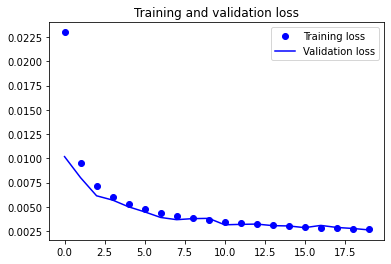

In [34]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(epochs)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()
plt.show()


Reconstruction of Test Images


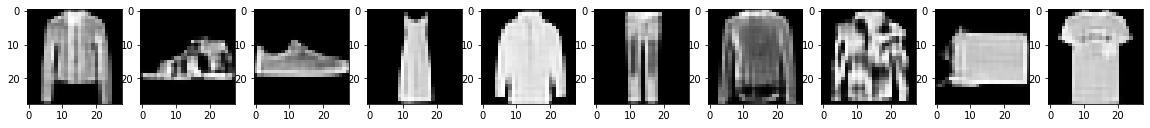

In [36]:

pred = autoencoder.predict(X_test)
plt.figure(figsize=(20, 4))
print("Reconstruction of Test Images")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(pred[i, ..., 0], cmap='gray')  
plt.show()